<a href="https://colab.research.google.com/github/amanim7md/amanim7md/blob/main/Detecting_Happy_and_Sad_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sad-and-happy-face-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3105538%2F5348785%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240306%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240306T215535Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da960b04ecbfac383ab6c65c97823a9481eea697e42566c44248b5ec0b22b8f0edf98adb52febcc25f21f4c9c33697f2a70ad2f95c7ae65df2b1f8d5dc2cbb0f4c43c415ba06f6d8e6e7fcc88146b338893fe4094a55dc34c93dc97cd81b9f8f802d5ca4c3e328288f85650c9ae102c6246bc09834954b379f47d2e4c85bc91b473a386363c7fa8e10e88ff2c309531d0e960b896c605b0ef4cd0326fc7c410fa2ac09699a1d5087e6b9fc1d3b26fa2ef044eb737ac953a4b63d4243f3d0eb556c770a06d63437b3669028fe91eeca0648e39562b6d5d48ca67e7ecc6123bb641404a8b4dbe6389981f57bb2cf05eb5bebdf514d3037374f72cb066ed52b2ef14'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 233086881 bytes downloaded
Downloaded and uncompressed: sad-and-happy-face-detection
Data source import complete.


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib as mp
import cv2
import imghdr
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data_dir = 'data'

In [ ]:
image_exts = ['jpeg' , 'jpg' ,'bmp' , 'png']

In [ ]:
os.listdir('/kaggle/input/sad-and-happy-face-detection/data')

['happy', 'sad']

In [ ]:
data_dir = '/kaggle/input/sad-and-happy-face-detection/data'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/sad-and-happy-face-detection/data')


Found 1988 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

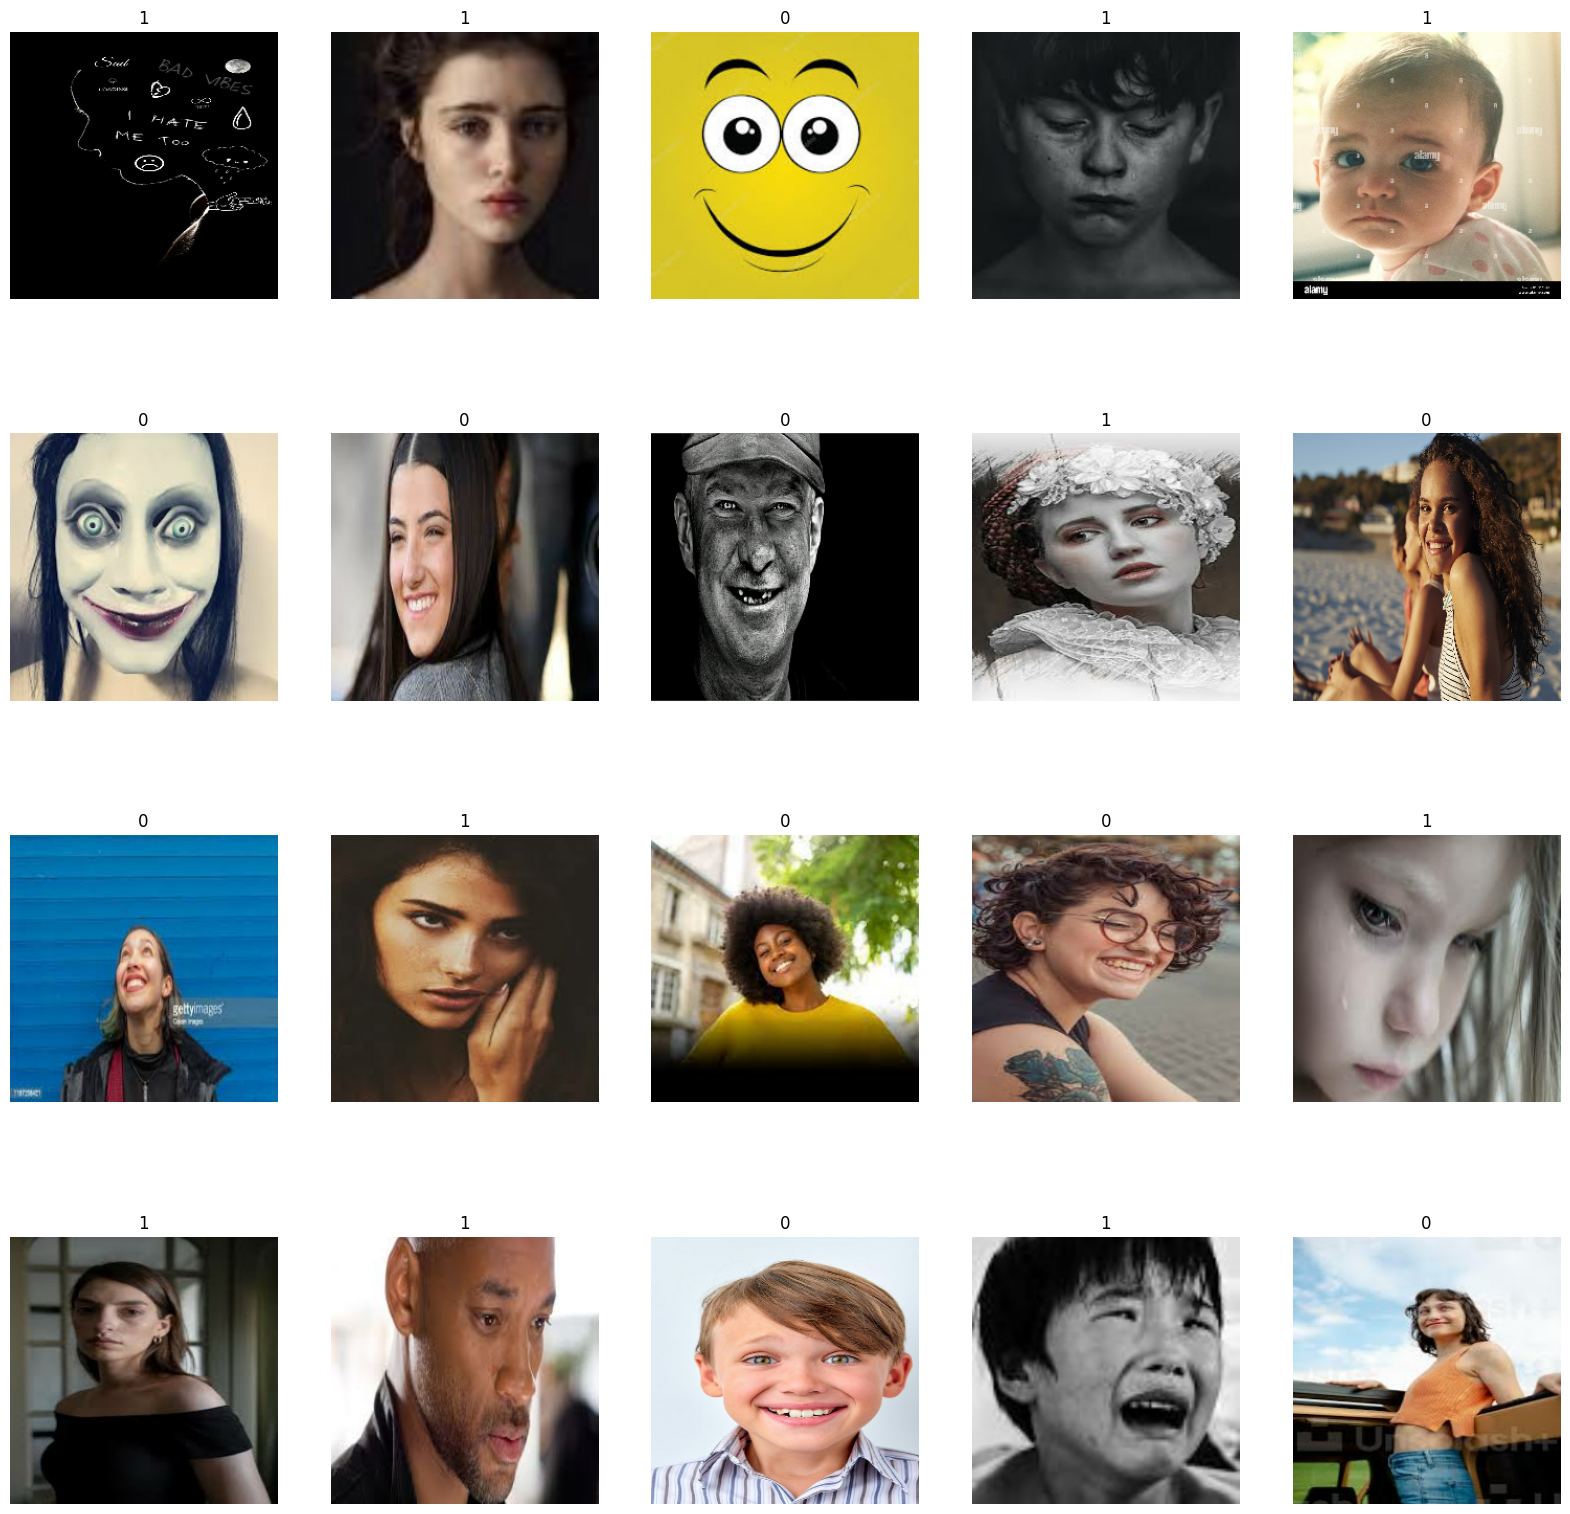

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    ax[idx//5, idx%5].imshow(img.astype(int))
    ax[idx//5, idx%5].title.set_text(batch[1][idx])
    ax[idx//5, idx%5].axis('off')

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
data.as_numpy_iterator().next()


(array([[[[0.5372549 , 0.654902  , 0.75686276],
          [0.5372549 , 0.654902  , 0.75686276],
          [0.5372549 , 0.654902  , 0.75686276],
          ...,
          [0.44804305, 0.27026272, 0.15425092],
          [0.49019608, 0.29607844, 0.1627451 ],
          [0.53464305, 0.32679993, 0.16601562]],
 
         [[0.53920805, 0.6568551 , 0.7588159 ],
          [0.53920805, 0.6568551 , 0.7588159 ],
          [0.53920805, 0.6568551 , 0.7588159 ],
          ...,
          [0.4284352 , 0.26176855, 0.1539254 ],
          [0.48824295, 0.29412532, 0.16079198],
          [0.527451  , 0.31960785, 0.15882353]],
 
         [[0.5411765 , 0.65882355, 0.7607843 ],
          [0.5411765 , 0.65882355, 0.7607843 ],
          [0.5411765 , 0.65882355, 0.7607843 ],
          ...,
          [0.40066636, 0.24901961, 0.14705883],
          [0.47517616, 0.28105852, 0.14772518],
          [0.5235294 , 0.3156863 , 0.15490197]],
 
         ...,
 
         [[0.28427544, 0.2764323 , 0.29604015],
          [0.27613

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Dense , Flatten , Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/30
44/44 [==============================] - 30s 677ms/step - loss: 0.0180 - accuracy: 0.9929 - val_loss: 1.1156 - val_accuracy: 0.7969
Epoch 2/30
44/44 [==============================] - 17s 376ms/step - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.8090 - val_accuracy: 0.8255
Epoch 3/30
44/44 [==============================] - 17s 376ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.8488 - val_accuracy: 0.8255
Epoch 4/30
44/44 [==============================] - 14s 319ms/step - loss: 0.0193 - accuracy: 0.9922 - val_loss: 0.9811 - val_accuracy: 0.8281
Epoch 5/30
44/44 [==============================] - 17s 387ms/step - loss: 0.0141 - accuracy: 0.9922 - val_loss: 0.9855 - val_accuracy: 0.8307
Epoch 6/30
44/44 [==============================] - 14s 315ms/step - loss: 0.0190 - accuracy: 0.9908 - val_loss: 0.9756 - val_accuracy: 0.8385
Epoch 7/30
44/44 [==============================] - 17s 389ms/step - loss: 0.0151 - accuracy: 0.9943 - val_loss: 0.8748 - val_accuracy: 0.8281

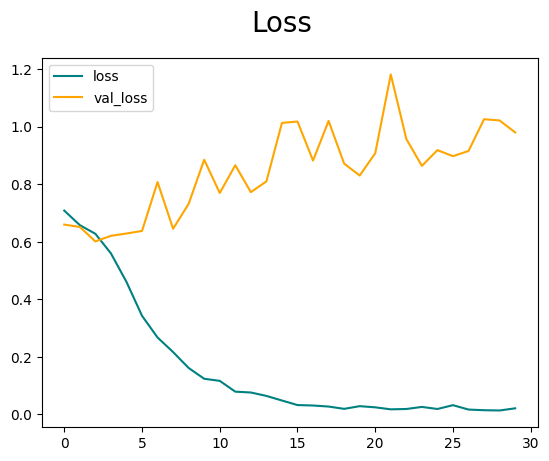

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

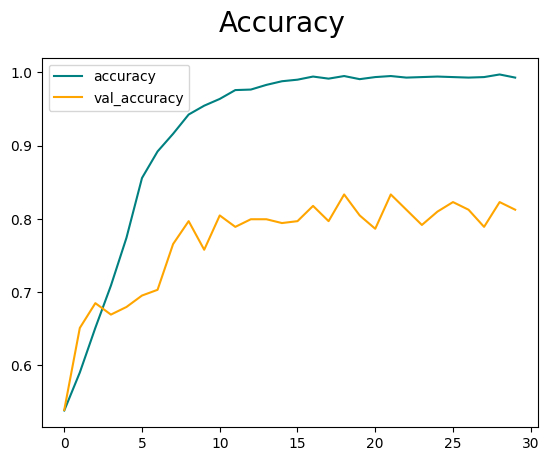

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color ='teal' , label ='accuracy')
plt.plot(hist.history['val_accuracy'], color ='orange' , label = 'val_accuracy')
fig.suptitle('Accuracy' , fontsize =20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 28ms/step


In [ ]:
print(pre.result(), re.result(),acc.result())

tf.Tensor(0.71304345, shape=(), dtype=float32) tf.Tensor(0.78846157, shape=(), dtype=float32) tf.Tensor(0.7135417, shape=(), dtype=float32)


<function matplotlib.pyplot.show(close=None, block=None)>

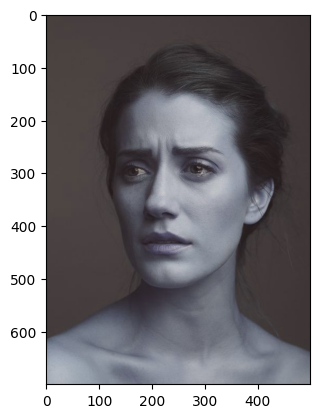

In [ ]:
img = cv2.imread('/kaggle/input/sad-and-happy-face-detection/666.jpg')
plt.imshow(img)
plt.show

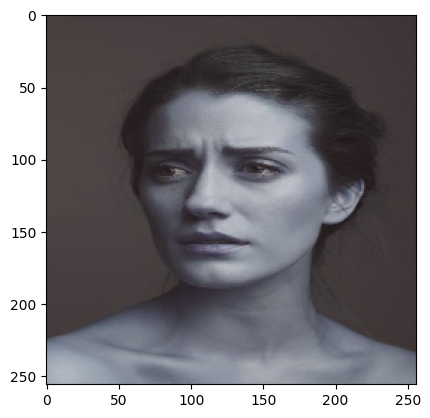

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))


1/1 [==============================] - 0s 271ms/step


In [ ]:
yhat

array([[0.993668]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print (f'Predicted Class is Sad Face')
else:
    print (f'Predicted Class is Happy Face')

Predicted Class is Sad Face


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('imageclassifier.h5'))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255,0))


1/1 [==============================] - 0s 69ms/step


array([[0.99748456]], dtype=float32)

In [ ]:
# Save the model to a file called 'my_model.h5'
model.save('my_model.h5')

In [ ]:
import pickle

# Save the trained model to a file.
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
# Use the loaded model for predictions
predictions = model.predict(data)

63/63 [==============================] - 9s 133ms/step


In [ ]:
!pip install google-cloud-aiplatform

In [1]:
!pip install gh

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
  Created wheel for gh: filename=gh-0.0.4-py3-none-any.whl size=2471 sha256=b91b242171096b3f7cf956a65ece93d2b7d5b556c1b6bcca64ff1785f2d6778f
  Stored in directory: /root/.cache/pip/wheels/ff/ed/e0/db6c8678f2b4aa7815c77c35a64817751dbb9c8c2475b12332
Successfully built gh


In [2]:
!gh auth login

usage: gh [-h] [--home] [-p] [-b] [-s] [-r] [-t] [-c] [-w] [-i] [-d] [-v]
gh: error: unrecognized arguments: auth login


In [3]:
!gh repo create <repository-name>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `gh repo create <repository-name>'


In [4]:
!git add .

fatal: not a git repository (or any of the parent directories): .git


In [5]:
!git commit -m "Initial commit"

fatal: not a git repository (or any of the parent directories): .git


In [6]:
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
